# Preparation

In [1]:
# import all libraries
import os
import glob
import pandas as pd
import numpy as np
import math

import scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import math

import xml.etree.ElementTree as ET

#make all folders
curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/Output_TimeSeries/'
print(mtfolder)

processedfolder = curfolder + '/TS_processed/'
vidfolder = curfolder + '/Output_Videos/'

# get all the files in the folder
mtfiles = glob.glob(mtfolder + '*body_world.csv')
print(mtfiles)

vidfiles = glob.glob(vidfolder + '*.mp4')
print(vidfiles)

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/
['/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch2_g20_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/leise_g_ch2_g18_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/langsam_g_ch2_g8_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch2_g17_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch3_g17_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch3_g20_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/Donner_g_ch1

# Clean, flip, interpolate, smooth the data

In [2]:
# method to clean the data
def clean_data(file):
    sample = pd.read_csv(file)
    sample
    fileID = os.path.basename(file)
    #print(fileID)

# replace _body.csv with ''
    fileID = fileID.replace('_body_world.csv', '')
    #print(fileID)



# add fileID column to the sample
    sample['fileID'] = fileID

# get the participant ID from the fileID:
    split_string = fileID.split('ch')[1]
    split_string = split_string.split('_g')
    chain_num = split_string[0]
    split_string_gen = split_string[1].split("_compr")
    gen_num = split_string_gen[0]
    participantID = "ch" + chain_num + "g" +gen_num
    sample['participantID'] = participantID

# in the sample, get rid of all columns that contain visibility
    visibility_columns = [col for col in sample.columns if 'visibility' in col]

# get rid of all columns that contain visibility
    sample = sample.drop(visibility_columns, axis=1)
    return sample

# method to flip the data
def flip_data(df):
    cols = df.columns
    cols  = [col for col in df.columns if 'Y_' in col]
    cols = list(cols)
        # first get the vertical height of the configuration
        # we only do this for the first frame; the transformation will be applied to all frames
    maxpoint = []
    for joint in cols:
        maxpoint.append(df.loc[0, joint])
        # iterate over each joint, in each frame, to flip the y-axis
    for frame in range(len(df)):
        for joint in cols:
            ytrans = max(maxpoint) - df.loc[frame, joint] - 1
            df.loc[frame, joint] = ytrans
    return df

# interpolate the data
def interpolate(sample):
    cols = sample.columns

# put away time and fileID from cols
    cols = cols.drop(['time', 'fileID', 'participantID'])

# loop over the cols and interpolate missing data
    for col in cols:
        sample[col] = sample[col].interpolate(method='linear', x = sample['time'], limit=10)
    return cols, sample

# smooth the data
def smooth_data(sample):
    cols_upperbody = ['X_NOSE', 'Y_NOSE', 'Z_NOSE', 'X_LEFT_EYE_INNER', 'Y_LEFT_EYE_INNER', 'Z_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE', 'Z_LEFT_EYE', 'X_LEFT_EYE_OUTER', 'Y_LEFT_EYE_OUTER', 'Z_LEFT_EYE_OUTER', 'X_RIGHT_EYE_OUTER', 'Y_RIGHT_EYE_OUTER', 'Z_RIGHT_EYE_OUTER', 'X_RIGHT_EYE', 'Y_RIGHT_EYE', 'Z_RIGHT_EYE', 'X_RIGHT_EYE_OUTER.1', 'Y_RIGHT_EYE_OUTER.1', 'Z_RIGHT_EYE_OUTER.1', 'X_LEFT_EAR', 'Y_LEFT_EAR', 'Z_LEFT_EAR', 'X_RIGHT_EAR', 'Y_RIGHT_EAR', 'Z_RIGHT_EAR', 'X_MOUTH_LEFT', 'Y_MOUTH_LEFT', 'Z_MOUTH_LEFT', 'X_MOUTH_RIGHT', 'Y_MOUTH_RIGHT', 'Z_MOUTH_RIGHT', 'X_LEFT_SHOULDER', 'Y_LEFT_SHOULDER', 'Z_LEFT_SHOULDER', 'X_RIGHT_SHOULDER', 'Y_RIGHT_SHOULDER', 'Z_RIGHT_SHOULDER', 'X_LEFT_ELBOW', 'Y_LEFT_ELBOW', 'Z_LEFT_ELBOW', 'X_RIGHT_ELBOW', 'Y_RIGHT_ELBOW', 'Z_RIGHT_ELBOW', 'X_LEFT_WRIST', 'Y_LEFT_WRIST', 'Z_LEFT_WRIST', 'X_RIGHT_WRIST', 'Y_RIGHT_WRIST', 'Z_RIGHT_WRIST', 'X_LEFT_PINKY', 'Y_LEFT_PINKY', 'Z_LEFT_PINKY', 'X_RIGHT_PINKY', 'Y_RIGHT_PINKY', 'Z_RIGHT_PINKY', 'X_LEFT_INDEX', 'Y_LEFT_INDEX', 'Z_LEFT_INDEX', 'X_RIGHT_INDEX', 'Y_RIGHT_INDEX', 'Z_RIGHT_INDEX', 'X_LEFT_THUMB', 'Y_LEFT_THUMB', 'Z_LEFT_THUMB', 'X_RIGHT_THUMB', 'Y_RIGHT_THUMB']
    cols_lowerbody = ['X_LEFT_HIP',
       'Y_LEFT_HIP', 'Z_LEFT_HIP', 'X_RIGHT_HIP', 'Y_RIGHT_HIP', 'Z_RIGHT_HIP',
       'X_LEFT_KNEE', 'Y_LEFT_KNEE', 'Z_LEFT_KNEE', 'X_RIGHT_KNEE',
       'Y_RIGHT_KNEE', 'Z_RIGHT_KNEE', 'X_LEFT_ANKLE', 'Y_LEFT_ANKLE',
       'Z_LEFT_ANKLE', 'X_RIGHT_ANKLE', 'Y_RIGHT_ANKLE', 'Z_RIGHT_ANKLE',
       'X_LEFT_HEEL', 'Y_LEFT_HEEL', 'Z_LEFT_HEEL', 'X_RIGHT_HEEL',
       'Y_RIGHT_HEEL', 'Z_RIGHT_HEEL', 'X_LEFT_FOOT_INDEX',
       'Y_LEFT_FOOT_INDEX', 'Z_LEFT_FOOT_INDEX', 'X_RIGHT_FOOT_INDEX',
       'Y_RIGHT_FOOT_INDEX', 'Z_RIGHT_FOOT_INDEX']

# smooth upperbody and face with savgol 20,4
    for col in cols_upperbody:
        sample[col] = scipy.signal.savgol_filter(sample[col], 30, 1)

# smooth lowerbod with savgol 30,3
    for col in cols_lowerbody:  
        sample[col] = scipy.signal.savgol_filter(sample[col], 30, 1)
    return(sample)

'''
def smooth_data_sample(sample, win1, ord1, win2, ord2):
    cols_upperbody = ['X_NOSE', 'Y_NOSE', 'Z_NOSE', 'X_LEFT_EYE_INNER', 'Y_LEFT_EYE_INNER', 'Z_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE', 'Z_LEFT_EYE', 'X_LEFT_EYE_OUTER', 'Y_LEFT_EYE_OUTER', 'Z_LEFT_EYE_OUTER', 'X_RIGHT_EYE_OUTER', 'Y_RIGHT_EYE_OUTER', 'Z_RIGHT_EYE_OUTER', 'X_RIGHT_EYE', 'Y_RIGHT_EYE', 'Z_RIGHT_EYE', 'X_RIGHT_EYE_OUTER.1', 'Y_RIGHT_EYE_OUTER.1', 'Z_RIGHT_EYE_OUTER.1', 'X_LEFT_EAR', 'Y_LEFT_EAR', 'Z_LEFT_EAR', 'X_RIGHT_EAR', 'Y_RIGHT_EAR', 'Z_RIGHT_EAR', 'X_MOUTH_LEFT', 'Y_MOUTH_LEFT', 'Z_MOUTH_LEFT', 'X_MOUTH_RIGHT', 'Y_MOUTH_RIGHT', 'Z_MOUTH_RIGHT', 'X_LEFT_SHOULDER', 'Y_LEFT_SHOULDER', 'Z_LEFT_SHOULDER', 'X_RIGHT_SHOULDER', 'Y_RIGHT_SHOULDER', 'Z_RIGHT_SHOULDER', 'X_LEFT_ELBOW', 'Y_LEFT_ELBOW', 'Z_LEFT_ELBOW', 'X_RIGHT_ELBOW', 'Y_RIGHT_ELBOW', 'Z_RIGHT_ELBOW', 'X_LEFT_WRIST', 'Y_LEFT_WRIST', 'Z_LEFT_WRIST', 'X_RIGHT_WRIST', 'Y_RIGHT_WRIST', 'Z_RIGHT_WRIST', 'X_LEFT_PINKY', 'Y_LEFT_PINKY', 'Z_LEFT_PINKY', 'X_RIGHT_PINKY', 'Y_RIGHT_PINKY', 'Z_RIGHT_PINKY', 'X_LEFT_INDEX', 'Y_LEFT_INDEX', 'Z_LEFT_INDEX', 'X_RIGHT_INDEX', 'Y_RIGHT_INDEX', 'Z_RIGHT_INDEX', 'X_LEFT_THUMB', 'Y_LEFT_THUMB', 'Z_LEFT_THUMB', 'X_RIGHT_THUMB', 'Y_RIGHT_THUMB']
    cols_lowerbody = ['X_LEFT_HIP',
       'Y_LEFT_HIP', 'Z_LEFT_HIP', 'X_RIGHT_HIP', 'Y_RIGHT_HIP', 'Z_RIGHT_HIP',
       'X_LEFT_KNEE', 'Y_LEFT_KNEE', 'Z_LEFT_KNEE', 'X_RIGHT_KNEE',
       'Y_RIGHT_KNEE', 'Z_RIGHT_KNEE', 'X_LEFT_ANKLE', 'Y_LEFT_ANKLE',
       'Z_LEFT_ANKLE', 'X_RIGHT_ANKLE', 'Y_RIGHT_ANKLE', 'Z_RIGHT_ANKLE',
       'X_LEFT_HEEL', 'Y_LEFT_HEEL', 'Z_LEFT_HEEL', 'X_RIGHT_HEEL',
       'Y_RIGHT_HEEL', 'Z_RIGHT_HEEL', 'X_LEFT_FOOT_INDEX',
       'Y_LEFT_FOOT_INDEX', 'Z_LEFT_FOOT_INDEX', 'X_RIGHT_FOOT_INDEX',
       'Y_RIGHT_FOOT_INDEX', 'Z_RIGHT_FOOT_INDEX']

# smooth upperbody and face with savgol 20,4
    for col in cols_upperbody:
        sample[col+win1+ord2] = scipy.signal.savgol_filter(sample[col], win1, ord1)

# smooth lowerbod with savgol 30,3
    for col in cols_lowerbody:  
        sample[col+win2+ord2] = scipy.signal.savgol_filter(sample[col], win2, ord2)
    return(sample)
'''


"\ndef smooth_data_sample(sample, win1, ord1, win2, ord2):\n    cols_upperbody = ['X_NOSE', 'Y_NOSE', 'Z_NOSE', 'X_LEFT_EYE_INNER', 'Y_LEFT_EYE_INNER', 'Z_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE', 'Z_LEFT_EYE', 'X_LEFT_EYE_OUTER', 'Y_LEFT_EYE_OUTER', 'Z_LEFT_EYE_OUTER', 'X_RIGHT_EYE_OUTER', 'Y_RIGHT_EYE_OUTER', 'Z_RIGHT_EYE_OUTER', 'X_RIGHT_EYE', 'Y_RIGHT_EYE', 'Z_RIGHT_EYE', 'X_RIGHT_EYE_OUTER.1', 'Y_RIGHT_EYE_OUTER.1', 'Z_RIGHT_EYE_OUTER.1', 'X_LEFT_EAR', 'Y_LEFT_EAR', 'Z_LEFT_EAR', 'X_RIGHT_EAR', 'Y_RIGHT_EAR', 'Z_RIGHT_EAR', 'X_MOUTH_LEFT', 'Y_MOUTH_LEFT', 'Z_MOUTH_LEFT', 'X_MOUTH_RIGHT', 'Y_MOUTH_RIGHT', 'Z_MOUTH_RIGHT', 'X_LEFT_SHOULDER', 'Y_LEFT_SHOULDER', 'Z_LEFT_SHOULDER', 'X_RIGHT_SHOULDER', 'Y_RIGHT_SHOULDER', 'Z_RIGHT_SHOULDER', 'X_LEFT_ELBOW', 'Y_LEFT_ELBOW', 'Z_LEFT_ELBOW', 'X_RIGHT_ELBOW', 'Y_RIGHT_ELBOW', 'Z_RIGHT_ELBOW', 'X_LEFT_WRIST', 'Y_LEFT_WRIST', 'Z_LEFT_WRIST', 'X_RIGHT_WRIST', 'Y_RIGHT_WRIST', 'Z_RIGHT_WRIST', 'X_LEFT_PINKY', 'Y_LEFT_PINKY', 'Z_LEFT_PINKY', 

# Obtain heights and normalize data


In [3]:
#obtains the height of the body and adds in a new mid shoulder point and mid ankle point
def obtain_height_by_ankle(sample):
    #obtain left shoulder values
    x_left = sample['X_LEFT_SHOULDER'].iloc[0]
    y_left = sample['Y_LEFT_SHOULDER'].iloc[0]
    z_left = sample['Z_LEFT_SHOULDER'].iloc[0]
    left_shoulder = (x_left, y_left, z_left)
    left_shoulder = np.array(left_shoulder)

   #obtain right shoulder values
    x_right = sample['X_RIGHT_SHOULDER'].iloc[0]
    y_right = sample['Y_RIGHT_SHOULDER'].iloc[0]
    z_right = sample['Z_RIGHT_SHOULDER'].iloc[0]
    right_shoulder = (x_right, y_right, z_right)
    right_shoulder = np.array(right_shoulder)

    #calculate the mid ankle point
    new_shoulder_point = (left_shoulder + right_shoulder)/2

    # obtain left ankle values
    x_left = sample['X_LEFT_ANKLE'].iloc[0]
    y_left = sample['Y_LEFT_ANKLE'].iloc[0]
    z_left = sample['Z_LEFT_ANKLE'].iloc[0]
    left_ankle = (x_left, y_left, z_left)
    left_ankle = np.array(left_ankle)

    # obtain right ankle values
    x_right = sample['X_RIGHT_ANKLE'].iloc[0]
    y_right = sample['Y_RIGHT_ANKLE'].iloc[0]
    z_right = sample['Z_RIGHT_ANKLE'].iloc[0]
    right_ankle = (x_right, y_right, z_right)
    right_ankle = np.array(right_ankle)

    # calculate the mid ankle point 
    new_ankle_point = (left_ankle + right_ankle)/2

    sample['X_MID_ANKLE'] = new_ankle_point[0]
    sample['Y_MID_ANKLE'] = new_ankle_point[1]
    sample['Z_MID_ANKLE'] = new_ankle_point[2]

    # length of body for 3 dimensions (identical result as above)
    length_of_body3 = math.sqrt(((new_shoulder_point[0]-new_ankle_point[0])**2)+((new_shoulder_point[1]-new_ankle_point[1])**2)+((new_shoulder_point[2]-new_ankle_point[2])**2))

    # adds the points to the sample sheet
    sample['X_MID_SHOULDER'] = new_shoulder_point[0]
    sample['Y_MID_SHOULDER'] = new_shoulder_point[1]
    sample['Z_MID_SHOULDER'] = new_shoulder_point[2]

    # adds the points to the sample sheet
    sample['X_MID_ANKLE'] = new_ankle_point[0]
    sample['Y_MID_ANKLE'] = new_ankle_point[1]
    sample['Z_MID_ANKLE'] = new_ankle_point[2]

    return length_of_body3

def obtain_height_by_ankle2D(sample):
    #obtain left shoulder values
    x_left = sample['X_LEFT_SHOULDER'].iloc[0]
    y_left = sample['Y_LEFT_SHOULDER'].iloc[0]
    left_shoulder = (x_left, y_left)
    left_shoulder = np.array(left_shoulder)

   #obtain right shoulder values
    x_right = sample['X_RIGHT_SHOULDER'].iloc[0]
    y_right = sample['Y_RIGHT_SHOULDER'].iloc[0]
    right_shoulder = (x_right, y_right)
    right_shoulder = np.array(right_shoulder)

    #calculate the mid ankle point
    new_shoulder_point = (left_shoulder + right_shoulder)/2

    # obtain left ankle values
    x_left = sample['X_LEFT_ANKLE'].iloc[0]
    y_left = sample['Y_LEFT_ANKLE'].iloc[0]
    left_ankle = (x_left, y_left)
    left_ankle = np.array(left_ankle)

    # obtain right ankle values
    x_right = sample['X_RIGHT_ANKLE'].iloc[0]
    y_right = sample['Y_RIGHT_ANKLE'].iloc[0]
    right_ankle = (x_right, y_right)
    right_ankle = np.array(right_ankle)

    # calculate the mid ankle point 
    new_ankle_point = (left_ankle + right_ankle)/2

    sample['X_MID_ANKLE'] = new_ankle_point[0]
    sample['Y_MID_ANKLE'] = new_ankle_point[1]

    # length of body for 3 dimensions (identical result as above)
    length_of_body3 = math.sqrt(((new_shoulder_point[0]-new_ankle_point[0])**2)+((new_shoulder_point[1]-new_ankle_point[1])**2))

    # adds the points to the sample sheet
    sample['X_MID_SHOULDER'] = new_shoulder_point[0]
    sample['Y_MID_SHOULDER'] = new_shoulder_point[1]

    # adds the points to the sample sheet
    sample['X_MID_ANKLE'] = new_ankle_point[0]
    sample['Y_MID_ANKLE'] = new_ankle_point[1]

    return length_of_body3

# method to normalize by length of body
def normalize_by_body(sample, length_of_body):
    cols = sample.columns
    # put away time and fileID and participantID from cols
    cols = cols.drop(['time', 'fileID', 'participantID'])
    for col in cols: 
        sample[col] = sample[col] / length_of_body
    return(sample)

def normalize_by_body2D(sample, length_of_body):
    cols = sample.columns
    # put away time and fileID and participantID from cols
    cols = cols.drop(['time', 'fileID', 'participantID'])
    cols = [col for col in cols if 'Z_' not in col]
    for col in cols: 
        sample[col] = sample[col] / length_of_body
    return(sample)



# 3D Animation

In [47]:

## plot all the keypoints in 3d space
def animation(sample):
# import pandas as pd
    import glob
    import os
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.animation import FuncAnimation
    import ffmpeg

    # 3D tracking checking
    fileexample = sample
    #fileexample_hands = sample_h
    #print('Well be looking at the following file: ' + fileexample)

    MT_tracking = sample
    #MT_tracking_hands = sample_h

    # Create a figure and axis
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Define the number of frames
    num_frames = len(MT_tracking)

    # Define the scatter plot
    scatter = ax.scatter([], [], [], marker='o')
    #scatter2 = ax.scatter([], [], [], marker='o')

# Update function for animation
    def update(frame):
        ax.clear()
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title('3D Animation')
        
        # Set the limits of the axes based on the maximum values
        ax.set_xlim3d(-1.1, 1.1)
        ax.set_ylim3d(-.8, .8)
        ax.set_zlim3d(-1, .5) #we need to flip the vertical
        
        # Plot the data for the current frame
        frame_data = MT_tracking.iloc[frame]
        frame_data_hands = MT_tracking.iloc[frame]
        x = frame_data.filter(like='X_')
        x_hands = frame_data_hands.filter(like='X_')
        y = frame_data.filter(like='Z_')
        y_hands = frame_data_hands.filter(like='Z_')
        z = frame_data.filter(like='Y_')
        z_hands = frame_data_hands.filter(like='Y_')
        # create scatter that has body in blue, and hands in red
        #scatter = ax.scatter(x, y, z, color='blue')
        scatter = ax.scatter(x_hands, y_hands, z_hands, color='red')

        return scatter

# Create the animation
    ani = FuncAnimation(fig, update, frames=num_frames, interval=1000/60)

# display the animation
    ani.save('3d_animation3.mp4', writer='ffmpeg')


import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ffmpeg

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ffmpeg

def animation2D(sample):
    # Define the tracking data
    MT_tracking = sample

    # Create a figure and axis for 2D plotting (keeping the original size)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    # Define the number of frames (assuming sample is a DataFrame with multiple rows)
    num_frames = len(MT_tracking)

    # Define the scatter plot (this will be updated in each frame)
    scatter = ax.scatter([], [], marker='o')

    # Update function for animation
    def update(frame):
        # Clear the axis for each frame (reset)
        ax.clear()

        # Set axis labels and title
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_title('2D Animation')

        # Set the limits of the axes, keeping the original similar limits
        ax.set_xlim(-1.1, 1.1)  # Keeping similar range to original X limits
        ax.set_ylim(-0.8, 0.8)   # Keeping similar range to original Y limits

        # Get the data for the current frame
        frame_data = MT_tracking.iloc[frame]
        x = frame_data.filter(like='X_')
        y = frame_data.filter(like='Y_')

        # Create the scatter plot for the current frame
        scatter = ax.scatter(x, y, color='red')

        return scatter,

    # Create the animation
    ani = FuncAnimation(fig, update, frames=num_frames, interval=1000/60)

    # Save the animation as a video
    ani.save('2d_animation.mp4', writer='ffmpeg')





# Derive Speed and Smooth

In [4]:
# derives the speed and smooths (and changes from cm/frame/second to cm/second)
def derive_speed_smooth(cols, sample, sr):
    speedcols = [col.replace('Y_', '') for col in cols]
    speedcols = [col.replace('X_', '') for col in speedcols]
    speedcols = [col.replace('Z_', '') for col in speedcols]

# keep only unique values
    speedcols = list(set(speedcols))

    for col in speedcols:
        x = sample['X_' + col]
        y = sample['Y_' + col]
        z = sample['Z_' + col]

    # calculate speed
        sample[col + '_speed'] = np.insert(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2 + np.diff(z) ** 2), 0, 0)
        # FLAGGED: multiply by sr to get to cm/s
        #switch to centimeters/second
        sample[col + '_speed'] = sample[col + '_speed']*sr
    #  smooth speed:
    for col in speedcols:
        sample[col + '_speed'] = scipy.signal.savgol_filter(sample[col + '_speed'], 20, 4)
    # OR
    #sample[col + '_speed'] = scipy.signal.savgol_filter(sample[col + '_speed'], 30, 3)
    return(speedcols, sample)

def derive_2dspeed_smooth(cols, sample, sr):
    #I LEGIT DON"T UNDERSTAND WHAT IS HAPPENING HERE. 
    speedcols = [col.replace('Y_', '') for col in cols]
    speedcols = [col.replace('X_', '') for col in speedcols]
    speedcols = [col.replace('Z_', '') for col in speedcols]


# keep only unique values
    speedcols = list(set(speedcols))

    for col in speedcols:
        x = sample['X_' + col]
        y = sample['Y_' + col]

    # calculate speed
        sample[col + '_speed2D'] = np.insert(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2), 0, 0)
        # FLAGGED: multiply by sr to get to cm/s
        #switch to centimeters/second
        sample[col + '_speed2D'] = sample[col + '_speed2D']*sr
    #  smooth speed:
    for col in speedcols:
        sample[col + '_speed2D'] = scipy.signal.savgol_filter(sample[col + '_speed2D'], 20, 4)
    # OR
    #sample[col + '_speed'] = scipy.signal.savgol_filter(sample[col + '_speed'], 30, 3)
    return(speedcols, sample)

# Derive vertical velocity and smooth

In [5]:
# Get a list of the columns that contain Y_
def derive_vertical_vel_smooth(sample):
    verticalcols = [col for col in sample.columns if 'Y_' in col]
    verticalcols = [col for col in verticalcols if 'speed' not in col]

# calculate the velocity
    for col in verticalcols:
        sample[col + '_velocity'] = np.insert(np.diff(sample[col]), 0, 0)  
    vel_cols = [col for col in sample.columns if "_velocity" in col]
    for col in vel_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)
    return verticalcols, sample


# Derive Acceleration and Smooth

In [6]:
# calculate the acceleration
def derive_accel_smooth(speedcols, sample):
    for col in speedcols:
        sample[col + '_acceleration'] = np.insert(np.diff(sample[col + "_speed"]), 0, 0) 
    accel_cols = [col for col in sample.columns if "_acceleration" in col]
    for col in accel_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)
    return (sample)

def derive_accel2D_smooth(speedcols, sample):
    for col in speedcols:
        sample[col + '_acceleration2D'] = np.insert(np.diff(sample[col + "_speed2D"]), 0, 0) 
    accel_cols = [col for col in sample.columns if "_acceleration2D" in col]
    for col in accel_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)
    return (sample)

# Derive Jerk and Smooth

In [7]:
# derive jerk from acceleration 
def derive_jerk_smooth(speedcols, sample):
    # calcuates the jerk for each vertical column
    for col in speedcols:
        sample[col + '_jerk'] = np.insert(np.diff(sample[col + "_acceleration"]), 0, 0)
    # gets a list of all jerk columns
    jerk_cols = [col for col in sample.columns if "_jerk" in col]
    # smooths all jerk columns
    for col in jerk_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)
    return (sample)

def derive_jerk2D_smooth(speedcols, sample):
    # calcuates the jerk for each vertical column
    for col in speedcols:
        sample[col + '_jerk2D'] = np.insert(np.diff(sample[col + "_acceleration2D"]), 0, 0)
    # gets a list of all jerk columns
    jerk_cols = [col for col in sample.columns if "_jerk2D" in col]
    # smooths all jerk columns
    for col in jerk_cols:
        sample[col] = scipy.signal.savgol_filter(sample[col], 20, 4)
    return (sample)


# Final code to process every file in Output_TimeSeries

Clean every file

In [13]:
# This block contains code to go through every file and clean it

import os
import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#get the timeseries files
curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/Output_TimeSeries/'
print(mtfolder)

cleanedfolder = curfolder + '/TS_cleaned'
os.makedirs(cleanedfolder)
processedfolder = curfolder + '/TS_processed/'
vidfolder = curfolder + '/Output_Videos/'

# get all the files in the folder
mtfiles = glob.glob(mtfolder + '*body_world.csv')
print(mtfiles)

vidfiles = glob.glob(vidfolder + '*.mp4')
print(vidfiles)

os.makedirs(processedfolder, exist_ok=True)

# for loop #1 to go through every file in the timeseries folder and clean it and save it in TS_cleaned
for file in mtfiles:
    # get the last part of the path in sample
    sample = clean_data(file)
    sample = flip_data(sample)
    cols, sample = interpolate(sample)
    sample = smooth_data(sample)
    # eventually here I can add back in the height calculus but I left it out for now. See next cell. 
    '''
    participantID = (sample['participantID'].iloc[0])
    height = obtain_height(sample)
    if participantID not in dict_of_heights:
        dict_of_heights[participantID] = [height]
    else:
        dict_of_heights[participantID].append(height)
    '''
    # collect the dictionary of heights per person
    # save it mt_process
    fileID=sample['fileID'][0]
    globals()[fileID] = sample
    globals()[fileID].to_csv(os.path.join(cleanedfolder, f'{fileID}.csv'), index=False)

# new loop over ts_process
    # normalize all cols by the height of the person
    # derive all
    # save it
'''
    sr = 1/np.mean(np.diff(sample['time']))
    speedcols, sample = derive_speed_smooth(cols, sample, sr)
    verticalcols, sample = derive_vertical_vel_smooth(sample)
    sample = derive_accel_smooth(verticalcols, sample)
    sample = derive_jerk_smooth(verticalcols, sample)
    fileID = sample['fileID'][0]
    globals()[fileID] = sample
    globals()[fileID].to_csv(os.path.join(processedfolder, f'{fileID}.csv'), index=False)
'''

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/
['/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch2_g20_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/leise_g_ch2_g18_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/langsam_g_ch2_g8_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch2_g17_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch3_g17_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch3_g20_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/Donner_g_ch1

"\n    sr = 1/np.mean(np.diff(sample['time']))\n    speedcols, sample = derive_speed_smooth(cols, sample, sr)\n    verticalcols, sample = derive_vertical_vel_smooth(sample)\n    sample = derive_accel_smooth(verticalcols, sample)\n    sample = derive_jerk_smooth(verticalcols, sample)\n    fileID = sample['fileID'][0]\n    globals()[fileID] = sample\n    globals()[fileID].to_csv(os.path.join(processedfolder, f'{fileID}.csv'), index=False)\n"

Create a dictionary of heights

In [14]:
# for loop #2: code to obtain the heights from every file and save in a dictionary (eventually will go back in to first for loop)
cleanedfolder = curfolder + '/TS_cleaned'

dict_of_heights = {}
cleanedfiles = glob.glob(cleanedfolder + '/*.csv')
for file in cleanedfiles:
    sample = pd.read_csv(file)
    participantID = (sample['participantID'].iloc[0])
    height = obtain_height_by_ankle2D(sample)
    if participantID not in dict_of_heights:
        dict_of_heights[participantID] = [height]
    else:
        dict_of_heights[participantID].append(height)

create a dictionary of mean heights

In [15]:
# code to get the mean heights
dict_of_means = {}
dict_of_sd = {}

# get the mean height
for key in dict_of_heights: 
    values = np.array(dict_of_heights[key])
    mean = np.mean(values)
    sd = np.std(values)
    #values= np.append(values, mean)
    dict_of_means[key] = mean
    dict_of_sd[key]= sd

# print them all out: 
for key in dict_of_heights:
    print(key)
    print(dict_of_heights[key])
    print(dict_of_means[key])
    print(dict_of_sd[key])

ch3g7
[1.1836349328056226, 1.1942185978067887, 1.1877115642481795, 1.190040006313731, 1.1702092648931994]
1.1851628732135042
0.008224760238014318
ch2g12
[1.2293184798333912, 1.23090842655094, 1.2457185808708457, 1.2199692414666607, 1.2159054337973476]
1.228364032503837
0.010336870494321443
ch3g19
[1.1950845338259077, 1.1852808956216405, 1.2005660451047782, 1.2174905757540544, 1.1812999006834402]
1.195944390197964
0.012763293844427485
ch3g12
[1.258288614990588, 1.2333285391896482, 1.2446629563909017, 1.2472333157006097, 1.2385260622307428]
1.244407897700498
0.008462511776104312
ch1g8
[1.2039693495718835, 1.2199276221434296, 1.2142930072447706, 1.1885700754097808, 1.1947091140882053]
1.2042938336916138
0.011692797162592992
ch1g14
[1.1410095401034122, 1.1705258809428052, 1.1565146547390566, 1.1859750319337274, 1.1692119852664042]
1.1646474185970812
0.015067513575358965
ch2g6
[1.2246862049722436, 1.2113563747898255, 1.2092314526885684, 1.2184503845690624, 1.20936237532673]
1.21461735846928

In [16]:
# check the mean of a certain one. 
dict_of_means['ch1g1']

np.float64(1.216431933883698)

In [35]:
# for loop #3: code to normalize all of the data based on the means and derive features. Saves to TS_processed folder. 
for file in cleanedfiles:
    print(file)
    sample = pd.read_csv(file)
    # normalize all data based on means
    participantID = (sample['participantID'].iloc[0])
    mean_body_length = dict_of_means[participantID]
    sample = normalize_by_body2D(sample, mean_body_length)

    # derive the kinematic features
    sr = 1/np.mean(np.diff(sample['time']))
    #speedcols, sample = derive_speed_smooth(cols, sample, sr)
    speedcols, sample = derive_2dspeed_smooth(cols, sample, sr)
    verticalcols, sample = derive_vertical_vel_smooth(sample)
    #sample = derive_accel_smooth(speedcols, sample)
    sample = derive_accel2D_smooth(speedcols, sample)
    #sample = derive_jerk_smooth(speedcols, sample)
    sample = derive_jerk2D_smooth(speedcols, sample)
    fileID = sample['fileID'][0]
    globals()[fileID] = sample
    globals()[fileID].to_csv(os.path.join(processedfolder, f'{fileID}.csv'), index=False)
    

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_cleaned/langsam_g_ch3_g7_compr.mp4.csv
['X_NOSE', 'Y_NOSE', 'X_LEFT_EYE_INNER', 'Y_LEFT_EYE_INNER', 'X_LEFT_EYE', 'Y_LEFT_EYE', 'X_LEFT_EYE_OUTER', 'Y_LEFT_EYE_OUTER', 'X_RIGHT_EYE_OUTER', 'Y_RIGHT_EYE_OUTER', 'X_RIGHT_EYE', 'Y_RIGHT_EYE', 'X_RIGHT_EYE_OUTER.1', 'Y_RIGHT_EYE_OUTER.1', 'X_LEFT_EAR', 'Y_LEFT_EAR', 'X_RIGHT_EAR', 'Y_RIGHT_EAR', 'X_MOUTH_LEFT', 'Y_MOUTH_LEFT', 'X_MOUTH_RIGHT', 'Y_MOUTH_RIGHT', 'X_LEFT_SHOULDER', 'Y_LEFT_SHOULDER', 'X_RIGHT_SHOULDER', 'Y_RIGHT_SHOULDER', 'X_LEFT_ELBOW', 'Y_LEFT_ELBOW', 'X_RIGHT_ELBOW', 'Y_RIGHT_ELBOW', 'X_LEFT_WRIST', 'Y_LEFT_WRIST', 'X_RIGHT_WRIST', 'Y_RIGHT_WRIST', 'X_LEFT_PINKY', 'Y_LEFT_PINKY', 'X_RIGHT_PINKY', 'Y_RIGHT_PINKY', 'X_LEFT_INDEX', 'Y_LEFT_INDEX', 'X_RIGHT_INDEX', 'Y_RIGHT_INDEX', 'X_LEFT_THUMB', 'Y_LEFT_THUMB', 'X_RIGHT_THUMB', 'Y_RIGHT_THUMB', 'X_LEFT_HIP', 'Y_LEFT_HIP', 'X_RIGHT_HIP', 'Y_RIGHT_HIP', 'X_LEFT_KNEE', 'Y_LEFT_KNEE', 'X_RIGHT_KNEE', 'Y_RIGHT_KN

Normalize all data by mean heights and derive features. 
saves to TS_processed folder

# Functions to align data with ELAN Annotations

In [37]:
import xml.etree.ElementTree as ET

# Function to parse elan file
def parse_eaf_file(eaf_file, rel_tiers):
    tree = ET.parse(eaf_file)
    root = tree.getroot()

    annotations = []
    relevant_tiers = {rel_tiers}
    
    time_order = root.find('TIME_ORDER')
    if time_order == None: 
        print ("no time order")
        print()
        annotations.append({
                        'tier_id': 'na',
                        'annotation_id': 'na',
                        'start_time': 'na',
                        'end_time': 'na',
                        'annotation_value': None
                    })
    else:
        time_slots = {time_slot.attrib['TIME_SLOT_ID']: time_slot.attrib['TIME_VALUE'] for time_slot in time_order}


        for tier in root.findall('TIER'):
            tier_id = tier.attrib['TIER_ID']
            if tier_id in relevant_tiers:
                for annotation in tier.findall('ANNOTATION/ALIGNABLE_ANNOTATION'):
                    # Ensure required attributes are present
                    if 'TIME_SLOT_REF1' in annotation.attrib and 'TIME_SLOT_REF2' in annotation.attrib:
                        ts_ref1 = annotation.attrib['TIME_SLOT_REF1']
                        ts_ref2 = annotation.attrib['TIME_SLOT_REF2']
                        # Get annotation ID if it exists, otherwise set to None
                        ann_id = annotation.attrib.get('ANNOTATION_ID', None)
                        annotation_value = annotation.find('ANNOTATION_VALUE').text.strip()
                        annotations.append({
                            'tier_id': tier_id,
                            'annotation_id': ann_id,
                            'start_time': time_slots[ts_ref1],
                            'end_time': time_slots[ts_ref2],
                            'annotation_value': annotation_value
                        })

    return annotations

# Function to load annotations into csv
def fillAnno(TSfile, ANNOfile, colname):
    TSfile[colname] = None
    for row in ANNOfile.iterrows():
        start = float(row[1][0])
        end = float(row[1][1])
        value = str(row[1][2])
        TSfile.loc[(TSfile['time'] >= start) & (TSfile['time'] <= end), colname] = value

Code to Align data with ELAN

In [38]:
# CREATE TXT FILE FOR EACH TIER FROM ELAN

################
#### arms ######
################
'''
import os
import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/Output_TimeSeries/'
print(mtfolder)

cleanedfolder = curfolder + '/TS_cleaned'
os.makedirs(cleanedfolder, exist_ok = True)
processedfolder = curfolder + '/TS_processed/'
vidfolder = curfolder + '/Output_Videos/'

# get all the files in the folder
mtfiles = glob.glob(mtfolder + '*body_world.csv')
print(mtfiles)

vidfiles = glob.glob(vidfolder + '*.mp4')
print(vidfiles)

os.makedirs(processedfolder, exist_ok=True)
'''

annofolder_manu = curfolder + '/ELAN_anno/'
annofiles_manu= glob.glob(annofolder_manu + '*.eaf')

annotations_groundTruth = curfolder + '/annotations_groundTruth/'
os.makedirs(annotations_groundTruth)
arms_anno = curfolder + '/annotations_groundTruth/arms_annotations.txt'

 # skip files that we aren't including: 
toskip = [annofolder_manu + 'rennen_g_ch1_g17_compr.eaf', annofolder_manu + 'langsam_g_ch2_g8_compr.eaf']

with open(arms_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        print('filename:')
        print(filename)
        print(toskip[0])
        if filename in toskip:
            print("this is faulty file")
            continue
        # parse the file
        annotations = parse_eaf_file(file, 'arms')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")

###################
#### upper body####
###################

upperbody_anno = curfolder + '/annotations_groundTruth/upperbody_annotations.txt'

with open(upperbody_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        # parse the file
        if filename in toskip:
            print("this is faulty file")
            continue
        annotations = parse_eaf_file(file, 'upper_body')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")

###################
#### lower body####
###################

lowerbody_anno = curfolder + '/annotations_groundTruth/lowerbody_annotations.txt'

with open(lowerbody_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        if filename in toskip:
            print("this is faulty file")
            continue
        # parse the file
        annotations = parse_eaf_file(file, 'lower_body')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")

###################
##### head ########
###################

head_anno = curfolder + '/annotations_groundTruth/head_annotations.txt'

with open(head_anno, 'w') as f:
    for file in annofiles_manu:
        print('working on ' + file)
        # get the filename as the last element
        filename = file.split('\\')[-1]
        # replace _ELAN_tiers.eaf with ''
        filename = filename.replace('_ELAN_tiers.eaf', '')
        print(filename)
        print(toskip[0])
        if filename in toskip:
            print("this is faulty file")
            continue
        # parse the file
        annotations = parse_eaf_file(file, 'head_mov')
        # write the annotations
        for annotation in annotations:
            f.write(f"{annotation['start_time']}\t{annotation['end_time']}\t{annotation['annotation_value']}\t{filename}\n")


working on /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/Donner_g_ch3_g15_compr.eaf
filename:
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/Donner_g_ch3_g15_compr.eaf
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/rennen_g_ch1_g17_compr.eaf
working on /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/langsam_g_ch1_g20_compr.eaf
filename:
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/langsam_g_ch1_g20_compr.eaf
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/rennen_g_ch1_g17_compr.eaf
working on /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/leise_g_ch3_g11_compr.eaf
filename:
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/leise_g_ch3_g11_compr.eaf
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/rennen_g_ch1_g17_compr.eaf
working on /Users/gillianros

Merge the annotations with the data

In [39]:
# # ADD THE MOVEMENT ANNOTATION FROM TXTFILE TO THE DATAFRAME/CSV FILE THAT WE CREATED BY THE PROCESSING SCRIPT
# These are the annotations per tier that we just created from manual annotations
arms_anno = curfolder + '/annotations_groundTruth/arms_annotations.txt'
upperbody_anno = curfolder + '/annotations_groundTruth/upperbody_annotations.txt'
lowerbody_anno = curfolder + '/annotations_groundTruth/lowerbody_annotations.txt'
head_anno = curfolder + '/annotations_groundTruth/head_annotations.txt'

curfolder = os.getcwd()
processedfolder = curfolder + '/TS_processed/'
processedfiles = glob.glob(processedfolder + '*.csv')

movementfolder = curfolder + '/TS_movement/'
os.makedirs(movementfolder)


#videos that I need to leave out due to error so I will skip them
toskip = [processedfolder + 'rennen_g_ch1_g17_compr', processedfolder + 'langsam_g_ch2_g8_compr']

for file in processedfiles:
    print('working on ' + file)

    # TrialID
    trialid = file.split('\\')[-1].split('.')[0]

    if trialid in toskip:
        print("this is faulty file")
        continue

    trialid = trialid.replace('TS_processed', 'ELAN_anno')
    #trialid = trialid.replace('merged_', '')
    trialid = trialid + '.eaf'

    # Load the merged file
    merged = pd.read_csv(file)
    
    # Load the annotations as df
    arms = pd.read_csv(arms_anno, sep='\t', header=None)
    ub = pd.read_csv(upperbody_anno, sep='\t', header=None)
    lb = pd.read_csv(lowerbody_anno, sep='\t', header=None)
    head = pd.read_csv(head_anno, sep='\t', header=None)

    #print(arms)
    
    annos = [arms, ub, lb, head]

    # Loop over each tier and fill values into timeseries
    for anno_df in annos:
        # Get the annotations for the trialid
        anno_trial = anno_df[anno_df[3] == trialid] 
        
        if anno_trial.empty:
            print("empty")
            print('no annotations for ' + trialid)
            #add a column
            continue
        
        else:
            if anno_df.equals(arms):
                fillAnno(merged, anno_trial, 'arms')
            elif anno_df.equals(ub):
                fillAnno(merged, anno_trial, 'upper_body')
            elif anno_df.equals(lb):
                fillAnno(merged, anno_trial, 'lower_body')
            elif anno_df.equals(head):
                fillAnno(merged, anno_trial, 'head_mov')
            else:
                print('something went wrong')

    df = merged.copy()
    # check if each column exists in the dataframe
    col1 = 'arms'
    col2 = 'upper_body'
    col3 = 'lower_body'
    col4 = 'head_mov'
    # create a column if it doesn't exist. If it does, switch the labels. 
    if col1 not in df:
        df[col1] = 'no movement'
    else:
        df['arms'] = df['arms'].fillna('no movement')

    if col2 not in df:
        df[col2] = 'no movement'
    else:
        df['upper_body'] = df['upper_body'].fillna('no movement')

    if col3 not in df:
        df[col3] = 'no movement'
    else:
        df['lower_body'] = df['lower_body'].fillna('no movement')

    if col4 not in df:
        df[col4] = 'no movement'
    else:
        df['head_mov'] = df['head_mov'].fillna('no movement')

    # save the dataframe to TS movement
    fileID = trialid.replace('/ELAN_anno/', '/TS_movement/')
    print(fileID)
    globals()[fileID] = df
    globals()[fileID].to_csv(os.path.join(movementfolder, f'{fileID}.csv'), index=False)




working on /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_processed/langsam_g_ch3_g7_compr.mp4.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/langsam_g_ch3_g7_compr.eaf
working on /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_processed/Donner_g_ch2_g12_compr.mp4.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch2_g12_compr.eaf
working on /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_processed/kalt_g_ch3_g19_compr.mp4.csv
empty
no annotations for /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_anno/kalt_g_ch3_g19_compr.eaf
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/kalt_g_ch3_g19_compr.eaf
working on /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_processed/langsam_g_ch3_g12_compr.mp4.csv
empty
no annotations for /Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/ELAN_

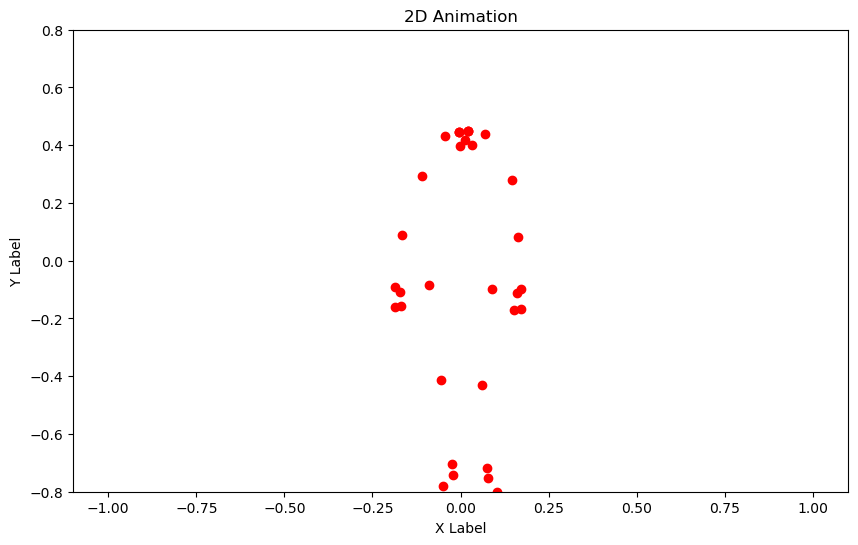

In [48]:
sample2 = '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch2_g1_compr.eaf.csv'
sample2 = pd.read_csv(sample2)
movement_sample2 = sample2[sample2['head_mov'] == 'movement']
#cols = ['X_NOSE', 'Y_NOSE', 'Z_NOSE']
cols = movement_sample2.columns
cols = cols.drop(['time', 'fileID', 'participantID'])
cols = [col for col in cols if '_velocity' not in col]
cols = [col for col in cols if '_speed2D' not in col]
cols = [col for col in cols if '_speed' not in col]
cols = [col for col in cols if '_acceleration2D' not in col]
cols = [col for col in cols if '_acceleration' not in col]
cols = [col for col in cols if '_jerk2D' not in col]
cols = [col for col in cols if '_jerk' not in col]

animation2D(sample2[cols])


In [24]:
sample2

,time,X_NOSE,Y_NOSE,Z_NOSE,X_LEFT_EYE_INNER,Y_LEFT_EYE_INNER,Z_LEFT_EYE_INNER,X_LEFT_EYE,Y_LEFT_EYE,Z_LEFT_EYE,...,RIGHT_EAR_jerk,LEFT_PINKY_jerk,LEFT_HIP_jerk,NOSE_jerk,LEFT_ELBOW_jerk,LEFT_THUMB_jerk,upper_body,head_mov,arms,lower_body
0,0.000000,0.002639,0.408345,-0.224627,0.010308,0.438230,-0.213098,0.010619,0.438508,-0.212620,...,-0.000005,1.323486e-06,2.442648e-07,-0.000005,-0.000002,8.979341e-07,no movement,no movement,no movement,no movement
1,16.666667,0.003078,0.409881,-0.211971,0.010597,0.439511,-0.199980,0.010912,0.439805,-0.199497,...,-0.000007,-3.765985e-06,6.022399e-08,-0.000007,-0.000002,-3.537519e-06,no movement,no movement,no movement,no movement
2,33.333333,0.003311,0.411150,-0.203297,0.010710,0.440596,-0.191007,0.011029,0.440902,-0.190520,...,-0.000008,-6.098484e-06,-5.714113e-08,-0.000008,-0.000003,-5.549507e-06,no movement,no movement,no movement,no movement
3,50.000000,0.003376,0.412165,-0.197879,0.010683,0.441484,-0.185417,0.011004,0.441798,-0.184927,...,-0.000008,-6.423889e-06,-1.224018e-07,-0.000008,-0.000002,-5.799004e-06,no movement,no movement,no movement,no movement
4,66.666667,0.003308,0.412941,-0.195052,0.010544,0.442178,-0.182517,0.010868,0.442497,-0.182024,...,-0.000007,-5.400289e-06,-1.485614e-07,-0.000006,-0.000002,-4.865678e-06,no movement,no movement,no movement,no movement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,7016.666667,0.009008,0.413419,-0.194731,0.016384,0.442597,-0.183489,0.016725,0.442907,-0.183002,...,0.000005,3.919134e-06,-4.000201e-08,0.000005,0.000003,3.676856e-06,no movement,no movement,no movement,no movement
422,7033.333333,0.009560,0.413125,-0.195025,0.016965,0.442303,-0.183863,0.017306,0.442612,-0.183377,...,0.000008,3.349334e-06,-4.504746e-08,0.000008,0.000003,3.303874e-06,no movement,no movement,no movement,no movement
423,7050.000000,0.010256,0.412746,-0.195371,0.017724,0.441915,-0.184302,0.018066,0.442224,-0.183817,...,0.000010,2.074462e-06,-4.499709e-08,0.000011,0.000003,2.325335e-06,no movement,no movement,no movement,no movement
424,7066.666667,0.011119,0.412293,-0.195594,0.018699,0.441441,-0.184630,0.019041,0.441750,-0.184145,...,0.000012,-9.061896e-08,-3.843434e-08,0.000013,0.000003,5.713795e-07,no movement,no movement,no movement,no movement


In [25]:
sample

,time,X_NOSE,Y_NOSE,Z_NOSE,X_LEFT_EYE_INNER,Y_LEFT_EYE_INNER,Z_LEFT_EYE_INNER,X_LEFT_EYE,Y_LEFT_EYE,Z_LEFT_EYE,...,LEFT_EYE_jerk,MOUTH_LEFT_jerk,LEFT_KNEE_jerk,MOUTH_RIGHT_jerk,RIGHT_EAR_jerk,LEFT_PINKY_jerk,LEFT_HIP_jerk,NOSE_jerk,LEFT_ELBOW_jerk,LEFT_THUMB_jerk
0,0.000000,0.013951,0.415085,-0.186612,0.018637,0.446529,-0.173794,0.018947,0.446708,-0.173374,...,0.000011,0.000010,5.920308e-06,0.000010,0.000011,0.000005,2.407880e-07,0.000010,0.000003,0.000005
1,16.666667,0.014311,0.415710,-0.191085,0.019551,0.447091,-0.177394,0.019879,0.447279,-0.176967,...,-0.000002,-0.000003,2.974170e-07,-0.000004,-0.000004,-0.000004,2.162469e-08,-0.000003,-0.000002,-0.000005
2,33.333333,0.014728,0.415985,-0.194900,0.020371,0.447310,-0.180648,0.020713,0.447505,-0.180217,...,-0.000010,-0.000010,-3.082582e-06,-0.000011,-0.000012,-0.000008,-1.064351e-07,-0.000011,-0.000004,-0.000009
3,50.000000,0.015181,0.416001,-0.198074,0.021104,0.447276,-0.183505,0.021457,0.447478,-0.183070,...,-0.000012,-0.000012,-4.724526e-06,-0.000014,-0.000014,-0.000009,-1.647477e-07,-0.000013,-0.000004,-0.000009
4,66.666667,0.015650,0.415839,-0.200632,0.021755,0.447070,-0.185925,0.022115,0.447276,-0.185489,...,-0.000011,-0.000011,-5.079640e-06,-0.000013,-0.000013,-0.000007,-1.723494e-07,-0.000012,-0.000003,-0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,10233.333333,0.010017,0.404324,-0.246952,0.016343,0.434838,-0.233229,0.016673,0.435093,-0.232772,...,-0.000007,-0.000006,1.684745e-07,-0.000007,-0.000008,0.000008,2.641610e-07,-0.000007,-0.000002,0.000007
615,10250.000000,0.009027,0.403161,-0.248926,0.015191,0.433709,-0.235226,0.015522,0.433962,-0.234766,...,-0.000013,-0.000011,5.824743e-07,-0.000012,-0.000013,0.000010,2.924537e-07,-0.000012,-0.000004,0.000008
616,10266.666667,0.008036,0.402116,-0.250661,0.014041,0.432690,-0.236939,0.014371,0.432941,-0.236476,...,-0.000019,-0.000017,1.058744e-06,-0.000018,-0.000020,0.000013,3.084426e-07,-0.000018,-0.000007,0.000010
617,10283.333333,0.007096,0.401317,-0.251873,0.012960,0.431904,-0.238068,0.013289,0.432153,-0.237605,...,-0.000025,-0.000023,1.569000e-06,-0.000024,-0.000026,0.000016,3.111118e-07,-0.000025,-0.000010,0.000011


# CODE THAT IS HELPFUL AS I AM DEBUGGING BUT CONFUSING TO READ THROUGH. YOU CAN IGNORE

In [ ]:
#for file in cleanedfiles:
file = '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_cleaned/leise_g_ch1_g15_compr.mp4.csv'
print(file)
sample = pd.read_csv(file)
# normalize all data based on means
participantID = (sample['participantID'].iloc[0])
mean_body_length = dict_of_means[participantID]
sample = normalize_by_body(sample, mean_body_length)

# derive the kinematic features
sr = 1/np.mean(np.diff(sample['time']))
speedcols, sample = derive_speed_smooth(cols, sample, sr)
speedcols, sample = derive_2dspeed_smooth(cols, sample, sr)
verticalcols, sample = derive_vertical_vel_smooth(sample)
sample = derive_accel_smooth(speedcols, sample)
sample = derive_accel2D_smooth(speedcols, sample)
sample = derive_jerk_smooth(speedcols, sample)
sample = derive_jerk2D_smooth(speedcols, sample)
fileID = sample['fileID'][0]
    #globals()[fileID] = sample
    #globals()[fileID].to_csv(os.path.join(processedfolder, f'{fileID}.csv'), index=False)

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_cleaned/leise_g_ch1_g15_compr.mp4.csv


In [ ]:
#for file in cleanedfiles:
file = '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_cleaned/leise_g_ch1_g15_compr.mp4.csv'
print(file)
sample = pd.read_csv(file)
# normalize all data based on means
participantID = (sample['participantID'].iloc[0])
mean_body_length = dict_of_means[participantID]
sample = normalize_by_body(sample, mean_body_length)

# derive the kinematic features
sr = 1/np.mean(np.diff(sample['time']))
speedcols, sample = derive_speed_smooth(cols, sample, sr)
speedcols, sample = derive_2dspeed_smooth(cols, sample, sr)
verticalcols, sample = derive_vertical_vel_smooth(sample)
sample = derive_accel_smooth(speedcols, sample)
sample = derive_accel2D_smooth(speedcols, sample)
sample = derive_jerk_smooth(speedcols, sample)
sample = derive_jerk2D_smooth(speedcols, sample)
fileID = sample['fileID'][0]
    #globals()[fileID] = sample
    #globals()[fileID].to_csv(os.path.join(processedfolder, f'{fileID}.csv'), index=False)

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_cleaned/leise_g_ch1_g15_compr.mp4.csv


In [ ]:
# code to obtain the mean of a single value DONT RUN THIS ONE UNESS YOU DELETE THE MEAN LATER. 
key = 'ch1g13'
values = np.array(dict_of_heights[key])
print(len(values))
mean = np.mean(values)
print("mean: " + str(mean))
sd = np.std(values)
print("sd: " + str(sd))
values= np.append(values, mean)
dict_of_heights[key] = values

print(dict_of_heights['ch1g13'])
#np.delete(dict_of_heights['ch1g13'],5)

In [ ]:
#for file in cleanedfiles:
file = '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_cleaned/leise_g_ch1_g15_compr.mp4.csv'
print(file)
sample = pd.read_csv(file)
# normalize all data based on means
participantID = (sample['participantID'].iloc[0])
mean_body_length = dict_of_means[participantID]
sample = normalize_by_body(sample, mean_body_length)

# derive the kinematic features
sr = 1/np.mean(np.diff(sample['time']))
speedcols, sample = derive_speed_smooth(cols, sample, sr)
speedcols, sample = derive_2dspeed_smooth(cols, sample, sr)
verticalcols, sample = derive_vertical_vel_smooth(sample)
sample = derive_accel_smooth(speedcols, sample)
sample = derive_accel2D_smooth(speedcols, sample)
sample = derive_jerk_smooth(speedcols, sample)
sample = derive_jerk2D_smooth(speedcols, sample)
fileID = sample['fileID'][0]
    #globals()[fileID] = sample
    #globals()[fileID].to_csv(os.path.join(processedfolder, f'{fileID}.csv'), index=False)

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_cleaned/leise_g_ch1_g15_compr.mp4.csv


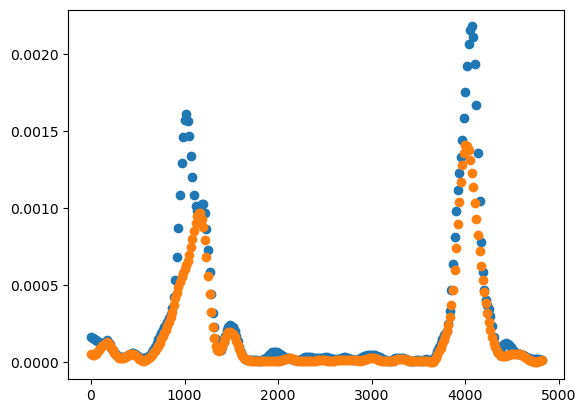

In [ ]:
plt.plot(sample['time'], sample['RIGHT_WRIST_speed'], marker='o', linestyle='')
plt.plot(sample['time'], sample['RIGHT_WRIST_speed2D'], marker='o', linestyle='')

In [ ]:
# unecessary cell that checks for the max and minimum of each
df_filtered = sample[[col for col in sample.columns if col.startswith('Z_')]]

print('z_min')
print((df_filtered.min()).min())

df_filtered = sample[[col for col in sample.columns if col.startswith('Z_')]]

print('z_max')
print((df_filtered.max()).max())

df_filtered = sample[[col for col in sample.columns if col.startswith('X_')]]

print('x_min')
print((df_filtered.min()).min())

df_filtered = sample[[col for col in sample.columns if col.startswith('X_')]]

print('x_max')
print((df_filtered.max()).max())

df_filtered = sample[[col for col in sample.columns if col.startswith('Y_')]]

print('y_min')
print((df_filtered.min()).min())

df_filtered = sample[[col for col in sample.columns if col.startswith('Y_')]]

print('y_max')
print((df_filtered.max()).max())

In [ ]:
# TEST COMPARING TWO DIFFERENT FILES
import os
import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/Output_TimeSeries/'
print(mtfolder)

processedfolder = curfolder + '/TS_processed/'
vidfolder = curfolder + '/Output_Videos/'

# get all the files in the folder
mtfiles = glob.glob(mtfolder + '*body_world.csv')

vidfiles = glob.glob(vidfolder + '*.mp4')
print(vidfiles)

file = mtfolder + 'Donner_g_ch1_g13_compr.mp4_body_world.csv'

print(file)

sample = clean_data(file)
sample = flip_data(sample)
cols, sample = interpolate(sample)
sample = smooth_data(sample)
print(obtain_height(sample))

file = mtfolder + 'langsam_g_ch1_g13_compr.mp4_body_world.csv'

print(file)

sample = clean_data(file)
sample = flip_data(sample)
cols, sample = interpolate(sample)
sample = smooth_data(sample)
print(obtain_height(sample))

file = mtfolder + 'kalt_g_ch1_g13_compr.mp4_body_world.csv'

print(file)

sample = clean_data(file)
sample = flip_data(sample)
cols, sample = interpolate(sample)
sample = smooth_data(sample)
print(obtain_height(sample))

file = mtfolder + 'leise_g_ch1_g13_compr.mp4_body_world.csv'

print(file)

sample = clean_data(file)
sample = flip_data(sample)
cols, sample = interpolate(sample)
sample = smooth_data(sample)
print(obtain_height(sample))

file = mtfolder + 'rennen_g_ch1_g13_compr.mp4_body_world.csv'

print(file)

sample = clean_data(file)
sample = flip_data(sample)
cols, sample = interpolate(sample)
sample = smooth_data(sample)
print(obtain_height(sample))

In [94]:
sample

,time,X_NOSE,Y_NOSE,Z_NOSE,X_LEFT_EYE_INNER,Y_LEFT_EYE_INNER,Z_LEFT_EYE_INNER,X_LEFT_EYE,Y_LEFT_EYE,Z_LEFT_EYE,...,RIGHT_WRIST_jerk,LEFT_HEEL_jerk,RIGHT_INDEX_jerk,LEFT_SHOULDER_jerk,RIGHT_PINKY_jerk,RIGHT_FOOT_INDEX_jerk,LEFT_EYE_OUTER_jerk,RIGHT_EYE_jerk,MOUTH_RIGHT_jerk,RIGHT_THUMB_jerk
0,0.000000,-0.005045,0.407006,-0.117414,0.000245,0.436598,-0.108388,0.000584,0.436903,-0.107920,...,-0.000002,8.263966e-06,-2.644870e-07,-1.442053e-06,-5.604432e-07,3.963102e-06,3.814336e-06,4.145398e-06,3.303040e-06,1.169363e-05
1,16.666667,-0.005236,0.406994,-0.115980,0.000185,0.436574,-0.107098,0.000524,0.436879,-0.106629,...,0.000005,5.659741e-07,5.879135e-06,5.539103e-07,5.865482e-06,4.924110e-07,1.793069e-06,1.844464e-06,1.961522e-06,4.118318e-06
2,33.333333,-0.005395,0.406989,-0.114580,0.000126,0.436555,-0.105815,0.000466,0.436860,-0.105345,...,0.000008,-4.011054e-06,8.380650e-06,1.761268e-06,8.549983e-06,-1.719918e-06,4.819607e-07,3.485282e-07,1.009867e-06,-6.162408e-07
3,50.000000,-0.005548,0.406991,-0.113176,0.000049,0.436542,-0.104514,0.000391,0.436847,-0.104043,...,0.000008,-6.185086e-06,8.210041e-06,2.327806e-06,8.478809e-06,-2.924573e-06,-3.170434e-07,-5.592668e-07,3.284536e-07,-3.219903e-06
4,66.666667,-0.005715,0.407000,-0.111737,-0.000063,0.436536,-0.103172,0.000281,0.436842,-0.102700,...,0.000007,-6.596635e-06,6.227507e-06,2.390349e-06,6.527325e-06,-3.348629e-06,-7.735935e-07,-1.065490e-06,-1.824772e-07,-4.312748e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,11783.333333,0.005690,0.411607,-0.155500,0.010863,0.440976,-0.142516,0.011210,0.441375,-0.142040,...,0.000027,4.315313e-06,3.044119e-05,1.153688e-06,2.983503e-05,-1.222456e-07,1.064018e-05,1.169838e-05,1.186681e-05,1.695007e-06
708,11800.000000,0.006225,0.411044,-0.155601,0.011480,0.440393,-0.142860,0.011826,0.440793,-0.142380,...,0.000038,5.541242e-06,4.078741e-05,1.753151e-06,4.089727e-05,-3.439555e-07,1.936405e-05,2.051300e-05,2.027034e-05,1.967164e-06
709,11816.666667,0.006332,0.410588,-0.153870,0.011632,0.439906,-0.141329,0.011976,0.440306,-0.140845,...,0.000049,6.485828e-06,5.104616e-05,2.663684e-06,5.191169e-05,-5.835608e-07,2.940865e-05,3.061002e-05,2.983940e-05,1.194307e-06
710,11833.333333,0.005874,0.410369,-0.149763,0.011162,0.439643,-0.137335,0.011505,0.440041,-0.136846,...,0.000059,6.992022e-06,6.077263e-05,3.951826e-06,6.234326e-05,-8.307002e-07,4.052191e-05,4.174008e-05,4.032751e-05,-9.921802e-07


0      0.000009
1      0.000028
2      0.000039
3      0.000045
4      0.000046
         ...   
707    0.000029
708    0.000031
709    0.000037
710    0.000047
711    0.000061
Name: LEFT_KNEE_speed, Length: 712, dtype: float64


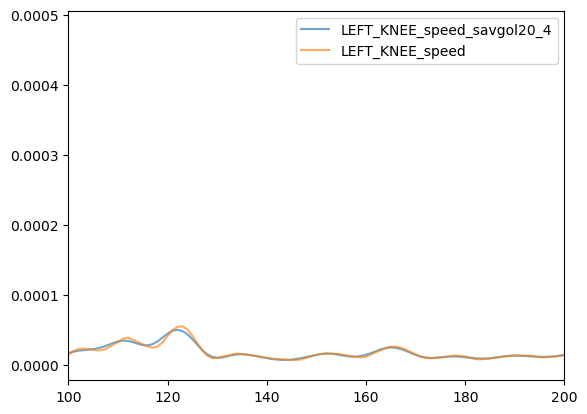

In [100]:
# test smoothing parameters for speed

import scipy
import matplotlib.pyplot as plt
x = 'LEFT_KNEE_speed'


# list possible window
window = [20]
# list possible orders
order = [4]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    print(sample[col])
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

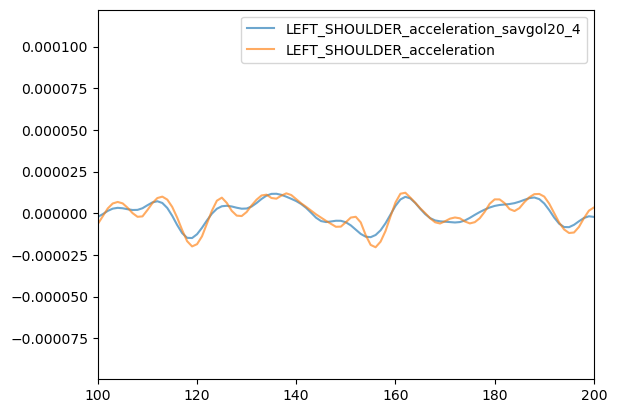

In [98]:
# test possible smoothing windows for vertical velocity 

import scipy
import matplotlib.pyplot as plt
x = 'LEFT_SHOULDER_acceleration'


# list possible window
window = [20]
# list possible orders
order = [4]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

In [85]:
# test possible smoothing windows for acceleration

import scipy
import matplotlib.pyplot as plt
x = 'Y_LEFT_ANKLE_acceleration'


# list possible window
window = [10]
# list possible orders
order = [3]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

KeyError: 'Y_LEFT_ANKLE_acceleration'

In [86]:
# test possible smoothing windows for jerk

import scipy
import matplotlib.pyplot as plt
x = 'Y_LEFT_WRIST_jerk'


# list possible window
window = [20]
# list possible orders
order = [4]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
plt.xlim(100, 200)
plt.show()

KeyError: 'Y_LEFT_WRIST_jerk'

In [ ]:
# visualization
plt.plot(sample['time'], sample['Z_LEFT_HIP'])
plt.show() 

In [88]:
sample

,time,X_NOSE,Y_NOSE,Z_NOSE,X_LEFT_EYE_INNER,Y_LEFT_EYE_INNER,Z_LEFT_EYE_INNER,X_LEFT_EYE,Y_LEFT_EYE,Z_LEFT_EYE,...,RIGHT_WRIST_jerk,LEFT_HEEL_jerk,RIGHT_INDEX_jerk,LEFT_SHOULDER_jerk,RIGHT_PINKY_jerk,RIGHT_FOOT_INDEX_jerk,LEFT_EYE_OUTER_jerk,RIGHT_EYE_jerk,MOUTH_RIGHT_jerk,RIGHT_THUMB_jerk
0,0.000000,-0.005045,0.407006,-0.117414,0.000245,0.436598,-0.108388,0.000584,0.436903,-0.107920,...,-0.000002,8.263966e-06,-2.644870e-07,-1.442053e-06,-5.604432e-07,3.963102e-06,3.814336e-06,4.145398e-06,3.303040e-06,1.169363e-05
1,16.666667,-0.005236,0.406994,-0.115980,0.000185,0.436574,-0.107098,0.000524,0.436879,-0.106629,...,0.000005,5.659741e-07,5.879135e-06,5.539103e-07,5.865482e-06,4.924110e-07,1.793069e-06,1.844464e-06,1.961522e-06,4.118318e-06
2,33.333333,-0.005395,0.406989,-0.114580,0.000126,0.436555,-0.105815,0.000466,0.436860,-0.105345,...,0.000008,-4.011054e-06,8.380650e-06,1.761268e-06,8.549983e-06,-1.719918e-06,4.819607e-07,3.485282e-07,1.009867e-06,-6.162408e-07
3,50.000000,-0.005548,0.406991,-0.113176,0.000049,0.436542,-0.104514,0.000391,0.436847,-0.104043,...,0.000008,-6.185086e-06,8.210041e-06,2.327806e-06,8.478809e-06,-2.924573e-06,-3.170434e-07,-5.592668e-07,3.284536e-07,-3.219903e-06
4,66.666667,-0.005715,0.407000,-0.111737,-0.000063,0.436536,-0.103172,0.000281,0.436842,-0.102700,...,0.000007,-6.596635e-06,6.227507e-06,2.390349e-06,6.527325e-06,-3.348629e-06,-7.735935e-07,-1.065490e-06,-1.824772e-07,-4.312748e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,11783.333333,0.005690,0.411607,-0.155500,0.010863,0.440976,-0.142516,0.011210,0.441375,-0.142040,...,0.000027,4.315313e-06,3.044119e-05,1.153688e-06,2.983503e-05,-1.222456e-07,1.064018e-05,1.169838e-05,1.186681e-05,1.695007e-06
708,11800.000000,0.006225,0.411044,-0.155601,0.011480,0.440393,-0.142860,0.011826,0.440793,-0.142380,...,0.000038,5.541242e-06,4.078741e-05,1.753151e-06,4.089727e-05,-3.439555e-07,1.936405e-05,2.051300e-05,2.027034e-05,1.967164e-06
709,11816.666667,0.006332,0.410588,-0.153870,0.011632,0.439906,-0.141329,0.011976,0.440306,-0.140845,...,0.000049,6.485828e-06,5.104616e-05,2.663684e-06,5.191169e-05,-5.835608e-07,2.940865e-05,3.061002e-05,2.983940e-05,1.194307e-06
710,11833.333333,0.005874,0.410369,-0.149763,0.011162,0.439643,-0.137335,0.011505,0.440041,-0.136846,...,0.000059,6.992022e-06,6.077263e-05,3.951826e-06,6.234326e-05,-8.307002e-07,4.052191e-05,4.174008e-05,4.032751e-05,-9.921802e-07


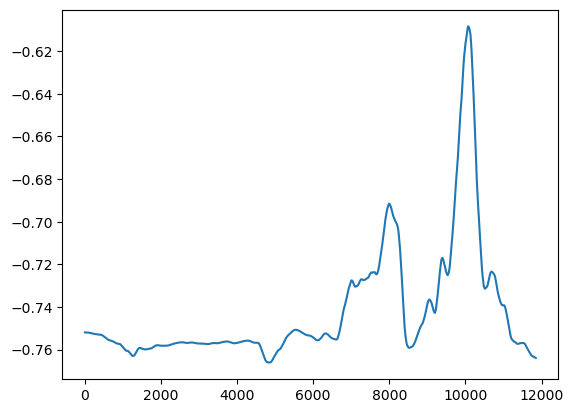

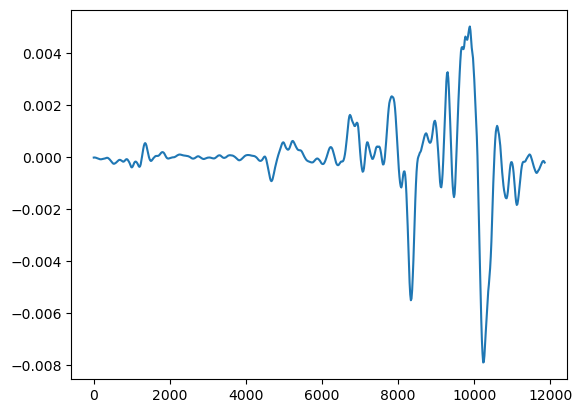

KeyError: 'Y_LEFT_HEEL_acceleration'

In [87]:
# plot all derivatives
plt.plot(sample['time'], sample['Y_LEFT_HEEL'])
plt.show()
plt.plot(sample['time'], sample['Y_LEFT_HEEL_velocity'])
plt.show()
plt.plot(sample['time'], sample['Y_LEFT_HEEL_acceleration'])
plt.show()
plt.plot(sample['time'], sample['Y_LEFT_HEEL_jerk'])
plt.show()

# Amalzying a single file from the beginning

In [8]:
# start with the output timeseries for that value. 
# import all libraries
import os
import glob
import pandas as pd
import numpy as np
import math

import scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import math

import xml.etree.ElementTree as ET
#make all folders
curfolder = os.getcwd()
print(curfolder)

output_folder = curfolder + '/Output_TimeSeries/'
print(output_folder)

TS_processed = curfolder + '/TS_processed/'
Output_videos = curfolder + '/Output_Videos/'

# get all the files in the folder
output_files = glob.glob(output_folder + '*body_world.csv')
print(output_files)

# get the file I want to work with: 
file = output_folder + 'leise_g_ch1_g1_compr.mp4_body_world.csv'

print(file)
sample = clean_data(file)
sample = flip_data(sample)
cols, sample = interpolate(sample)
print(cols)


/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/
['/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch2_g20_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/leise_g_ch2_g18_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/langsam_g_ch2_g8_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/kalt_g_ch2_g17_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch3_g17_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/rennen_g_ch3_g20_compr.mp4_body_world.csv', '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/Output_TimeSeries/Donner_g_ch1

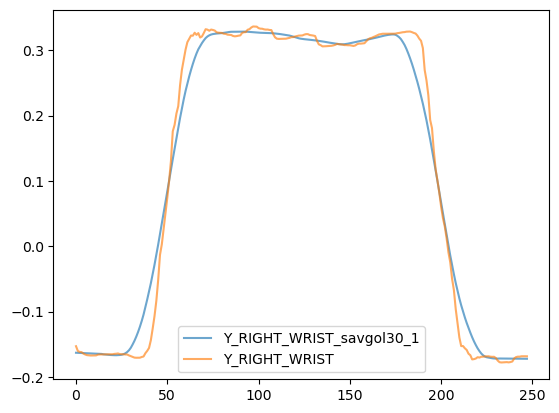

In [9]:
# test possible smoothing windows for position

import scipy
import matplotlib.pyplot as plt
x = 'Y_RIGHT_WRIST'


# list possible window
window = [30]
# list possible orders
order = [1]

# col of interest
samplecol = [x]

# iterate over handcols and apply all possible combinations of window and order, save it to new df
# prepare new df
df_smooth = pd.DataFrame()

for col in samplecol:
    for win in window:
        for ord in order:
            df_smooth[col + '_savgol' + str(win) + '_' + str(ord)] = scipy.signal.savgol_filter(sample[col], win, ord)


# make R_Hand_x from df_sample a list
LKnee_x = sample[x].tolist()
#LKnee_y = sample[y].tolist()
#LKnee_z = sample[z].tolist()


# load these values into df_smooth as a new column
df_smooth[x] = LKnee_x
##df_smooth[y] = LKnee_y
#df_smooth[z] = LKnee_z

#plot all R_Hand_x columns in one plot
colstoplot = [col for col in df_smooth.columns if x in col]
for col in colstoplot:
    plt.plot(df_smooth[col], label=col, alpha=0.65)
plt.legend()
# make only timewindow 50 to 250
#plt.xlim(0, 100)
plt.show()

In [ ]:
smooth_sample = smooth_data(sample)

In [ ]:
# normalize it by the height. 
dict_of_heights = {}
participantID = (smooth_sample['participantID'].iloc[0])
height = obtain_height_by_ankle2D(smooth_sample)
if participantID not in dict_of_heights:
    dict_of_heights[participantID] = [height]
else:
    dict_of_heights[participantID].append(height)

dict_of_means = {}
dict_of_sd = {}

# get the mean height
for key in dict_of_heights: 
    values = np.array(dict_of_heights[key])
    mean = np.mean(values)
    sd = np.std(values)
    #values= np.append(values, mean)
    dict_of_means[key] = mean
    dict_of_sd[key]= sd

# print them all out: 
for key in dict_of_heights:
    print(key)
    print(dict_of_heights[key])
    print(dict_of_means[key])
    print(dict_of_sd[key])

In [ ]:
participantID = (smooth_sample['participantID'].iloc[0])
mean_body_length = dict_of_means[participantID]
norm_sample = normalize_by_body2D(smooth_sample, mean_body_length)

# derive the kinematic features
sr = 1/np.mean(np.diff(norm_sample['time']))
#speedcols, sample = derive_speed_smooth(cols, sample, sr)
speedcols, norm_sample = derive_2dspeed_smooth(cols, norm_sample, sr)
verticalcols, norm_sample = derive_vertical_vel_smooth(norm_sample)
#sample = derive_accel_smooth(speedcols, sample)
norm_sample = derive_accel2D_smooth(speedcols, norm_sample)
#sample = derive_jerk_smooth(speedcols, sample)
norm_sample = derive_jerk2D_smooth(speedcols, sample)
fileID = sample['fileID'][0]